## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings("ignore")

## Import data

In [289]:
medals = pd.read_csv('medals_final.csv')
data = pd.read_csv('Data.csv')

In [290]:
medals.head()

,Year,Country,Medals,Host country
0,1984,United States,174,1
1,1984,West Germany,59,0
2,1984,Romania,53,0
3,1984,Canada,44,0
4,1984,Britain,37,0


In [291]:
medals.shape

(654, 4)

In [292]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1976 [YR1976],1980 [YR1980],1984 [YR1984],1988 [YR1988],1992 [YR1992],1996 [YR1996],2000 [YR2000],2004 [YR2004],2008 [YR2008],2012 [YR2012],2016 [YR2016]
0,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.666341,21.385711,19.774789,18.132025,NaN
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163713,13.969172,42.400000,69.100000,NaN
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.413901,32.500000,63.800000,NaN


In [293]:
data.shape

(415541, 16)

## Explore medals data

In [294]:
medals['Year'].unique()

array([1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [295]:
medals.columns = ['Year','Country Name','Medal','Host']

In [296]:
medals['Country Name'].nunique()

138

In [297]:
medals['Year'] = medals['Year'].astype(int)
medals['Country Name'] = medals['Country Name'].astype(str)

## Clean World bank data

In [298]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1976 [YR1976],1980 [YR1980],1984 [YR1984],1988 [YR1988],1992 [YR1992],1996 [YR1996],2000 [YR2000],2004 [YR2004],2008 [YR2008],2012 [YR2012],2016 [YR2016]
0,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.666341,21.385711,19.774789,18.132025,NaN
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163713,13.969172,42.400000,69.100000,NaN
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.413901,32.500000,63.800000,NaN


In [299]:
series_info = data.loc[:,['Series Name','Series Code']]

In [300]:
series_info.head()

,Series Name,Series Code
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
3,Access to electricity (% of population),EG.ELC.ACCS.ZS
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS


In [301]:
data['Series Code'].nunique()

1574

In [303]:
data['Series Name'].nunique()

1574

In [302]:
#data.pivot(index='Country Code', columns='variable', values='value')

In [304]:
data_test = data.copy()

In [305]:
data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1972 [YR1972]', '1976 [YR1976]', '1980 [YR1980]', '1984 [YR1984]',
       '1988 [YR1988]', '1992 [YR1992]', '1996 [YR1996]', '2000 [YR2000]',
       '2004 [YR2004]', '2008 [YR2008]', '2012 [YR2012]', '2016 [YR2016]'],
      dtype='object')

In [306]:
del data_test['Country Code']

In [307]:
del data_test['Series Code']

In [308]:
data_test_1 = pd.melt(data_test, id_vars=['Country Name','Series Name'], value_vars=data_test.columns.drop(['Country Name','Series Name']).tolist())

In [309]:
data_test_1 = data_test_1.dropna()

In [310]:
data_test_1.columns

Index(['Country Name', 'Series Name', 'variable', 'value'], dtype='object')

In [311]:
data_test_1.shape

(1937444, 4)

In [312]:
data_test_1[['Country Name','variable']].drop_duplicates().shape

(3156, 2)

In [313]:
data_test_1.head()

,Country Name,Series Name,variable,value
29,Afghanistan,Adjusted net national income (current US$),1972 [YR1972],1.553791e+09
32,Afghanistan,Adjusted net national income per capita (curre...,1972 [YR1972],1.325541e+02
37,Afghanistan,Adjusted savings: carbon dioxide damage (% of ...,1972 [YR1972],1.815273e-01
38,Afghanistan,Adjusted savings: carbon dioxide damage (curre...,1972 [YR1972],2.295967e+06
39,Afghanistan,Adjusted savings: consumption of fixed capital...,1972 [YR1972],4.607557e+00


In [314]:
data_test_1.index = data_test_1[['Country Name','variable']]

In [315]:
data_test_1.head()

,Country Name,Series Name,variable,value
"(Afghanistan, 1972 [YR1972])",Afghanistan,Adjusted net national income (current US$),1972 [YR1972],1.553791e+09
"(Afghanistan, 1972 [YR1972])",Afghanistan,Adjusted net national income per capita (curre...,1972 [YR1972],1.325541e+02
"(Afghanistan, 1972 [YR1972])",Afghanistan,Adjusted savings: carbon dioxide damage (% of ...,1972 [YR1972],1.815273e-01
"(Afghanistan, 1972 [YR1972])",Afghanistan,Adjusted savings: carbon dioxide damage (curre...,1972 [YR1972],2.295967e+06
"(Afghanistan, 1972 [YR1972])",Afghanistan,Adjusted savings: consumption of fixed capital...,1972 [YR1972],4.607557e+00


In [316]:
#del data_test_1['Country Name']

In [317]:
#del data_test_1['variable']

In [318]:
data_test_2 = data_test_1.pivot_table(values='value',index=['Country Name','variable'],columns='Series Name').reset_index()

In [319]:
data_test_2.shape

(3156, 1536)

In [320]:
data_test_2.head()

Series Name,Country Name,variable,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1972 [YR1972],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1976 [YR1976],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1980 [YR1980],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984 [YR1984],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1988 [YR1988],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
data_test_2 = data_test_2.rename(columns={'variable':'Year'})

In [322]:
data_test_2['Year'] =  data_test_2['Year'].map(lambda x : x[:5])

In [323]:
data_test_2.columns

Index(['Country Name', 'Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking  (% of population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
       ...
       'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
       'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)',
       'Women who believe a husband i

In [324]:
df = data_test_2.copy()

In [325]:
df.columns

Index(['Country Name', 'Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking  (% of population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
       ...
       'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
       'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)',
       'Women who believe a husband i

In [326]:
df.head()

Series Name,Country Name,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df['Year'].unique()

array(['1972 ', '1976 ', '1980 ', '1984 ', '1988 ', '1992 ', '1996 ',
       '2000 ', '2004 ', '2008 ', '2012 ', '2016 '], dtype=object)

In [328]:
df['Year'] = df['Year'].astype(int)

In [329]:
df['Country Name'] = df['Country Name'].astype(str)

# Merge Olympic medals and world bank data

In [330]:
master = medals.merge(df, how='left',on=['Country Name','Year'])

In [331]:
master['Host'] = master['Host'].astype(str)
master['Country Name'] = master['Country Name'].astype(str)

In [332]:
master.shape

(654, 1538)

In [333]:
master.head()

,Year,Country Name,Medal,Host,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),...,"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,1984,United States,174,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984,West Germany,59,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984,Romania,53,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984,Canada,44,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,Britain,37,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Drop rows with greater than 20% Null Values

In [334]:
master.shape

(654, 1538)

In [335]:
0.20*654

130.8

In [337]:
master = master.loc[:,master.isnull().sum()<131]

In [338]:
master.head()

,Year,Country Name,Medal,Host,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Air transport, passengers carried","Air transport, registered carrier departures worldwide",Cereal production (metric tons),...,Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)",Surface area (sq. km),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total),Urban population growth (annual %)
0,1984,United States,174,1,50.958786,18.143684,32.815103,340191488.0,5206200.0,314749500.0,...,25.656,0.282860,6.0,9629090.0,1.048559e+11,2.383778e+10,17.509125,175321738.0,74.344,1.067786
1,1984,West Germany,59,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984,Romania,53,0,54.024963,14.688375,39.336588,1163400.0,22100.0,20044700.0,...,51.074,-1.095317,8.0,238390.0,1.859571e+09,7.093039e+08,NaN,11084645.0,48.926,1.771074
3,1984,Canada,44,0,46.079019,14.692513,31.386505,19382600.0,343600.0,42793504.0,...,23.805,0.291860,6.0,9984670.0,8.699533e+09,2.491295e+09,52.474888,19583639.0,76.195,1.171941
4,1984,Britain,37,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove High Correlation

In [339]:
def remove_high_correlation(dataset, threshold,target_var):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns and colname!=target_var:
                    #print(colname)
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [340]:
data= remove_high_correlation(master,0.8,['Medal','Country Name','Host','Year'])

In [341]:
data.head()

,Year,Country Name,Medal,Host,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Air transport, passengers carried",Cereal production (metric tons),Cereal yield (kg per hectare),DEC alternative conversion factor (LCU per US$),...,Population growth (annual %),Population in largest city,Population in the largest city (% of urban population),"Population, female (% of total)","Preprimary education, duration (years)",Primary school starting age (years),Rural population (% of total population),Rural population growth (annual %),"Secondary education, duration (years)","Total reserves (includes gold, current US$)"
0,1984,United States,174,1,50.958786,18.143684,340191488.0,314749500.0,4374.1,1.0000,...,0.865817,15781501.0,9.001451,50.953316,3.0,6.0,25.656,0.282860,6.0,1.048559e+11
1,1984,West Germany,59,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984,Romania,53,0,54.024963,14.688375,1163400.0,20044700.0,3195.4,NaN,...,0.296830,1932707.0,17.435894,50.680795,4.0,7.0,51.074,-1.095317,8.0,1.859571e+09
3,1984,Canada,44,0,46.079019,14.692513,19382600.0,42793504.0,2028.0,1.2951,...,0.961734,3279588.0,16.746571,50.320407,2.0,6.0,23.805,0.291860,6.0,8.699533e+09
4,1984,Britain,37,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
data.to_csv('Final_Raw_Data.csv')

In [354]:
data['Year'].unique()

array([1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [287]:
#data.drop(['Year','Country Name'],axis=1, inplace=True)

In [343]:
#data.to_csv('Final_ML_Data.csv')

In [344]:
data =data.fillna(0)
#df = data.drop(['Year','Host','Country Name','Medal'],axis=1).copy()

# Decision Tree

In [345]:
# Create dummies for Decision Tree analysis
df  = pd.get_dummies(data=data, columns=['Host', 'Country Name'])

In [346]:
df.drop(['Year'],axis = 1, inplace=True)

In [347]:
# Define target and causal varaiables, y and x
y=df['Medal']
x = df.drop(['Medal'],axis = 1)

In [348]:
# Create a new tree with define characteristics
dt = DecisionTreeClassifier(min_samples_split=200, random_state=99,max_leaf_nodes=20)

In [349]:
# Fit the data set
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

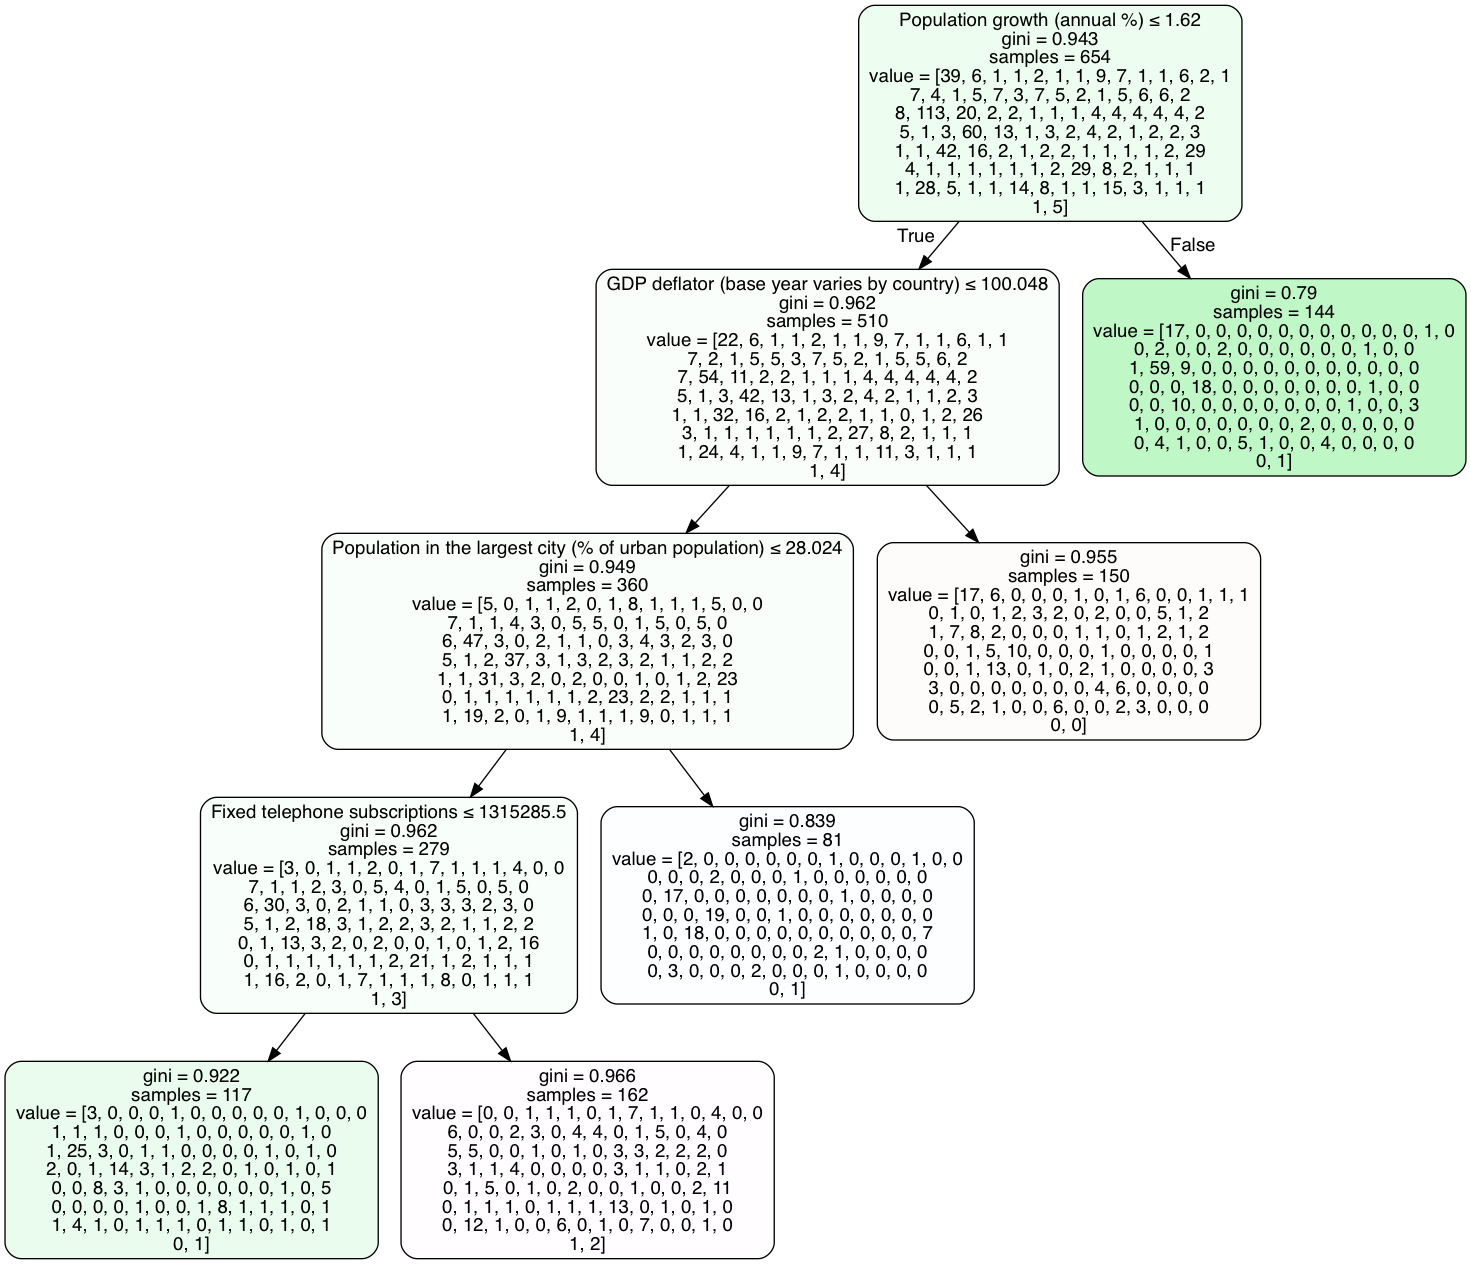

In [350]:
# Plot the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=list(x))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [351]:
# Identify the top 5 important features required to identify the target - Withdrawal final status
feature_imp = dt.feature_importances_
feature_names = x.keys().values
imp_features = sorted(zip(feature_names,feature_imp),key = lambda x:x[1], reverse=True)
imp_features = pd.DataFrame(imp_features[:3])
imp_features

,0,1
0,Population growth (annual %),0.448992
1,GDP deflator (base year varies by country),0.215270
2,Population in the largest city (% of urban pop...,0.182938


In [352]:
dt.score(x,y)

0.20336391437308868

In [353]:
# Classification error and accuracy of the matrix
z=dt.predict(x)
pd.crosstab(z,y)

Medal,1,10,100,101,102,103,108,10,11,110,...,8,82,88,8,9,91,91,92,94,9
row_0,,,,,,,,,,,,,,,,,,,,,
1,17,6,0,0,0,1,0,1,6,0,...,6,0,0,2,3,0,0,0,0,0
1,20,0,0,0,1,0,0,0,0,0,...,2,0,1,5,0,1,0,1,0,2
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,1,1,1,0,1,7,1,1,...,0,1,0,7,0,0,1,0,1,2


In [281]:
final = imp_features.merge(series_info, how='left',right_on='Series Code',left_on=0)

In [282]:
final = final.drop_duplicates()

In [283]:
final.drop([0],axis=1, inplace=True)

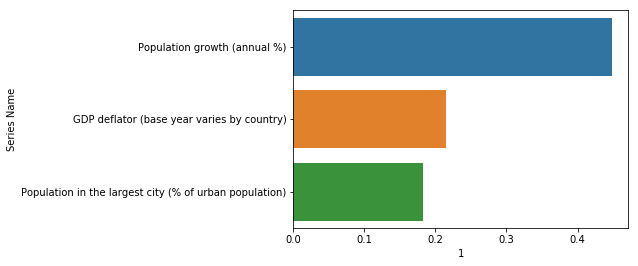

In [284]:
sns.barplot(x=final[1],y=final['Series Name'], data=final)

In [285]:
series_info.head()

,Series Name,Series Code
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
3,Access to electricity (% of population),EG.ELC.ACCS.ZS
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS


In [286]:
series_info.to_csv('Series_info.csv')

# PCA

In [254]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [253]:
df.head()

,Medal,AG.LND.CREL.HA,AG.LND.TOTL.K2,AG.YLD.CREL.KG,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.POP.DNST,EN.URB.LCTY,EN.URB.LCTY.UR.ZS,FI.RES.TOTL.CD,...,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Venezuela,Country Name_Vietnam,Country Name_Virgin Islands,Country Name_West Germany,Country Name_Yugoslavia,Country Name_Zambia,Country Name_Zimbabwe
0,174,71957016.0,9158960.0,4374.1,2.476000e+10,0.612766,25.748011,15781501.0,9.001451,1.048559e+11,...,1,0,0,0,0,0,0,0,0,0
1,59,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,1,0,0,0
2,53,6273030.0,230340.0,3195.4,0.000000e+00,0.000000,98.358687,1932707.0,17.435894,1.859571e+09,...,0,0,0,0,0,0,0,0,0,0
3,44,21101600.0,9093510.0,2028.0,4.753734e+09,1.337676,2.826411,3279588.0,16.746571,8.699533e+09,...,0,0,0,0,0,0,0,0,0,0
4,37,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0


In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(df)

In [256]:
pca.n_components

50

In [257]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [258]:
principalDf = pd.DataFrame(data = principalComponents)

In [259]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-6.419237e+12,-8.823891e+11,1.485802e+10,5.724747e+10,1.007476e+11,-3.405292e+10,-5.391900e+07,1.077669e+08,1.925877e+07,-1.828556e+06,...,-1.588686,0.991316,1.225803,2.839044,-2.673539,0.520111,0.386215,0.887746,0.193509,0.327812
1,-7.040940e+12,-9.375439e+11,-1.281544e+11,-4.393484e+10,-4.620867e+09,-6.202938e+09,-1.882659e+06,-4.068541e+06,-2.795543e+06,-2.196079e+06,...,0.354036,0.429776,0.093830,0.297801,0.007481,-0.085731,0.211642,-0.063738,0.074429,0.031762
2,-7.040940e+12,-9.375437e+11,-1.281541e+11,-4.208286e+10,-4.596018e+09,-6.368907e+09,-1.891787e+06,3.009334e+05,2.253522e+06,-1.213512e+06,...,-5.103786,-16.450628,-1.089359,-0.895389,5.478951,0.502448,-1.937218,1.395695,-6.159724,3.098509
3,-6.938707e+12,-9.285654e+11,-1.377273e+11,-3.433558e+10,-1.397819e+10,2.336829e+09,-2.079717e+06,1.533535e+07,1.271372e+07,-1.791513e+06,...,-6.210494,-1.034480,2.249343,-1.265431,-0.827287,-0.521220,3.241413,0.623461,-1.377472,-0.572657
4,-7.040940e+12,-9.375439e+11,-1.281544e+11,-4.393484e+10,-4.620867e+09,-6.202938e+09,-1.882659e+06,-4.068541e+06,-2.795543e+06,-2.196079e+06,...,0.078932,0.331929,0.051564,0.161393,0.077767,-0.113694,0.008890,-0.088321,0.079923,0.023335
